In [1]:
import tensorflow as tf
#import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
# Normalize the pixel values of the train and test images
training_images  = x_train / 255.0
test_images  = x_test / 255.0

# Model 1 Base Model

In [8]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
    
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'), 
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               590336    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(training_images, y_train, epochs=15, validation_data= (test_images, y_test))

Epoch 1/15
1563/1563 [==============================] - 22s 8ms/step - loss: 1.3993 - accuracy: 0.4897 - val_loss: 1.1373 - val_accuracy: 0.5945
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0268 - accuracy: 0.6363 - val_loss: 0.9730 - val_accuracy: 0.6617
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8550 - accuracy: 0.6983 - val_loss: 0.9347 - val_accuracy: 0.6722
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7161 - accuracy: 0.7480 - val_loss: 0.9246 - val_accuracy: 0.6801
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5986 - accuracy: 0.7885 - val_loss: 0.9105 - val_accuracy: 0.6933
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4806 - accuracy: 0.8322 - val_loss: 1.0153 - val_accuracy: 0.6909
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3798 - accuracy: 0.8661 - val_loss: 1.0378 - val_ac

In [11]:
# Evaluate the model on unseen data
model.evaluate(test_images, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.9817 - accuracy: 0.6846


[1.9817135334014893, 0.6845999956130981]

<Axes: >

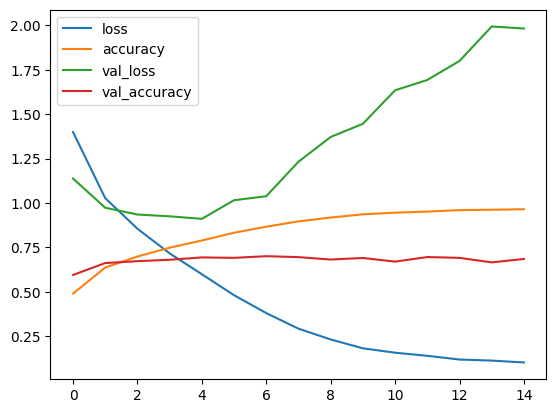

In [12]:
pd.DataFrame(history1.history).plot()

1. We can see here that training accuracy is around 90 percent.
2. Test accuracy is around 70 % which is not good.
3. Also test_loss increases alot from 6 epoch which means that our model started to overfit.
4. To solve overfitting different methods can be applied like Add more data, Decrease complexity of model, or use regularization.
5. We can not get more data and our model is already simple so can not decrease complexity.
6. So we will use regularization.

# Second Model

In [13]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                     
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
    
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'), 
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [14]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [15]:
model2.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(training_images, y_train, epochs=15, validation_data= (test_images, y_test))

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5106 - accuracy: 0.4534 - val_loss: 1.1995 - val_accuracy: 0.5698
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1829 - accuracy: 0.5809 - val_loss: 1.0813 - val_accuracy: 0.6191
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0386 - accuracy: 0.6343 - val_loss: 0.9834 - val_accuracy: 0.6513
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9389 - accuracy: 0.6679 - val_loss: 0.9227 - val_accuracy: 0.6761
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8584 - accuracy: 0.6963 - val_loss: 0.8775 - val_accuracy: 0.6923
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7898 - accuracy: 0.7220 - val_loss: 0.8607 - val_accuracy: 0.7026
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7386 - accuracy: 0.7419 - val_loss: 0.8360 - val_accurac

<Axes: >

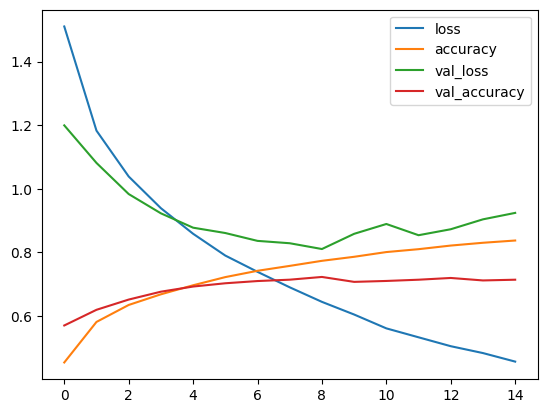

In [17]:
pd.DataFrame(history2.history).plot()

1. We can see train accuracy is around 83% and test accuracy is around 70%.
2. The accuracy has not changed much but we can see that the val-loss is way less than first model.

# Model 3 Add more layers with more filters

In [25]:
model3 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
                                     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                     
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
    
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'), 
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [26]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)        

In [27]:
model3.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(training_images, y_train, epochs=15, validation_data= (test_images, y_test))

Epoch 1/15
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5568 - accuracy: 0.4294 - val_loss: 1.2673 - val_accuracy: 0.5476
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1377 - accuracy: 0.5973 - val_loss: 1.0598 - val_accuracy: 0.6327
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9452 - accuracy: 0.6677 - val_loss: 0.8441 - val_accuracy: 0.7057
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8104 - accuracy: 0.7159 - val_loss: 0.8382 - val_accuracy: 0.7108
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7227 - accuracy: 0.7447 - val_loss: 0.7754 - val_accuracy: 0.7360
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6500 - accuracy: 0.7709 - val_loss: 0.7731 - val_accuracy: 0.7337
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5894 - accuracy: 0.7912 - val_loss: 0.6973 - val_ac

<Axes: >

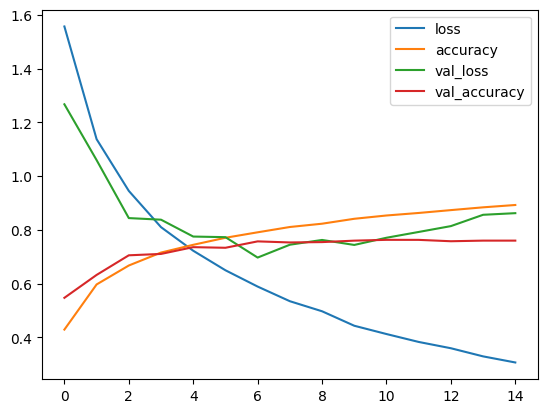

In [28]:
pd.DataFrame(history3.history).plot()

1. This time out val_accuracy increased to 76% which is better than previous model.
2. Also loss is not increasing.
3. This means adding more layers is good.

# Model 4 using Batch Normalizing

In [52]:
model4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                     tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                     
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                     tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
    
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [53]:
model4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 12, 12, 128)     

In [54]:
model4.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(training_images, y_train, epochs=15, validation_data= (test_images, y_test))

Epoch 1/15
1563/1563 [==============================] - 11s 6ms/step - loss: 1.2673 - accuracy: 0.5513 - val_loss: 0.9646 - val_accuracy: 0.6641
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8686 - accuracy: 0.6966 - val_loss: 0.9343 - val_accuracy: 0.6797
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7176 - accuracy: 0.7498 - val_loss: 0.7939 - val_accuracy: 0.7222
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6123 - accuracy: 0.7884 - val_loss: 0.6387 - val_accuracy: 0.7789
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5268 - accuracy: 0.8155 - val_loss: 0.7562 - val_accuracy: 0.7476
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4544 - accuracy: 0.8407 - val_loss: 0.7049 - val_accuracy: 0.7638
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3903 - accuracy: 0.8631 - val_loss: 0.6016 - val_ac

<Axes: >

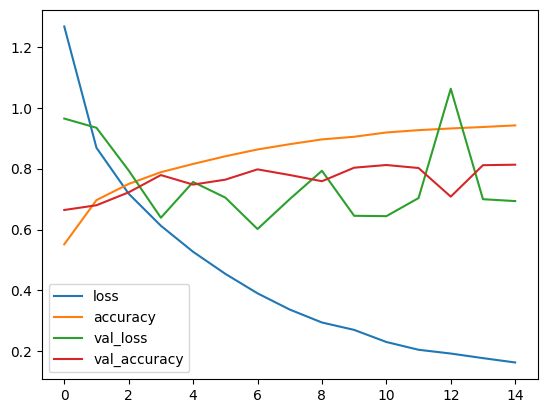

In [55]:
pd.DataFrame(history4.history).plot()

1. This is a great model with val_accuracy of 81% which is better than previous models.
2. Lets run for some more epochs and see if our score increases.

In [59]:
history5 = model4.fit(training_images, y_train, epochs=15, validation_data= (test_images, y_test))

Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0527 - accuracy: 0.9820 - val_loss: 0.9120 - val_accuracy: 0.8143
Epoch 2/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0565 - accuracy: 0.9801 - val_loss: 0.8566 - val_accuracy: 0.8308
Epoch 3/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0512 - accuracy: 0.9821 - val_loss: 0.8902 - val_accuracy: 0.8231
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0526 - accuracy: 0.9818 - val_loss: 0.9055 - val_accuracy: 0.8171
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0578 - accuracy: 0.9806 - val_loss: 0.8305 - val_accuracy: 0.8260
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0498 - accuracy: 0.9833 - val_loss: 0.8997 - val_accuracy: 0.8225
Epoch 7/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0475 - accuracy: 0.9835 - val_loss: 0.8450 - va

<Axes: >

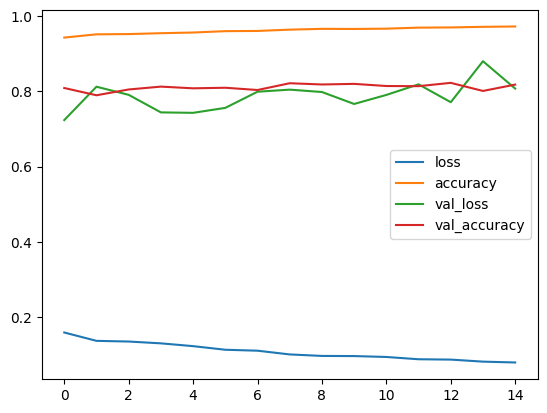

In [57]:
pd.DataFrame(history5.history).plot()

# 83 % score come after running it for around 60 epochs